In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial import distance

In [2]:
f = 'MX_ciudades.csv'
df = pd.read_csv(f,sep='\t',header=None,index_col=2,names=['X','Y','Ciudad'])
df

,X,Y
Ciudad,,
Gustavo A. Madero,0.603244,0.460621
San Fernando,0.623385,0.569956
Gustavo Díaz Ordaz,0.608631,0.646459
Zumpango,0.592009,0.290783
Zumpango del Río,0.577937,0.172304
...,...,...
Las Veredas,0.242132,0.476146
Profesor Carlos Hank González,0.597306,0.267320
Fraccionamiento la Trinidad,0.592559,0.292577


In [3]:
x = df.X
y = df.Y

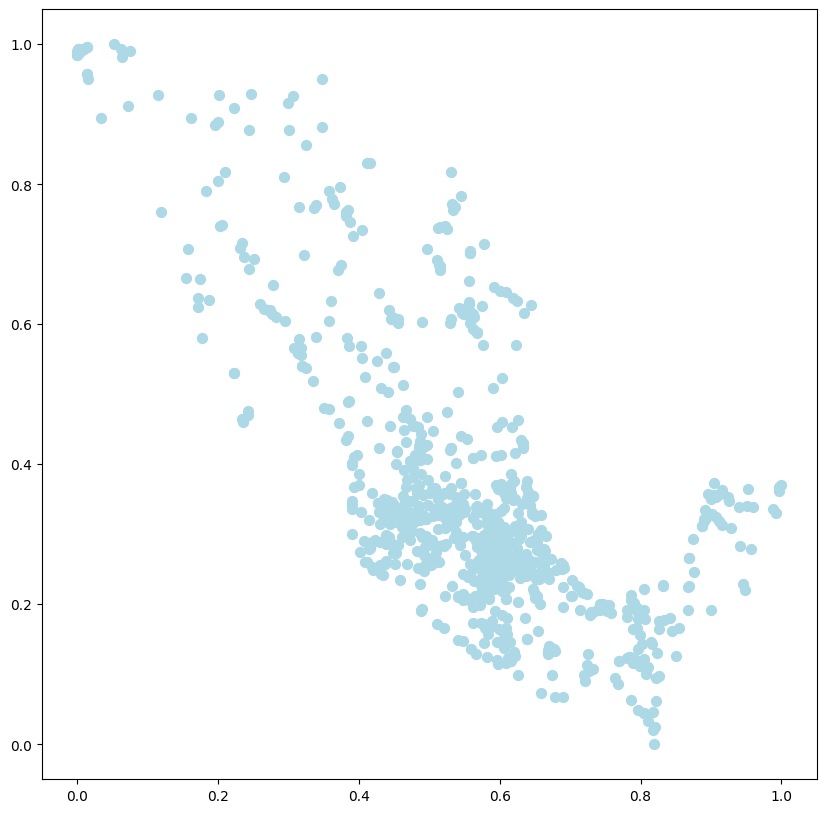

In [4]:
# plt.style.use('_mpl-gallery')

# plot
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y, s=50, c='lightblue')
plt.show()

## Calculo de las distancias

In [5]:
# Calcula la distancia esperada para cada ciudad
for i, ciudad in df.iterrows():
    ciudad_x = ciudad['X']
    ciudad_y = ciudad['Y']
    distancias = []
    
    # En este primer for se itera por cada ciudad en su coordenada X
    
    for j, otra_ciudad in df.iterrows():
        
        # En este for se itera en cada coordenada en Y, con el if se excluye la ciudad misma con la 
        # que se hace la comparacion
        
        if i != j:
            otra_ciudad_x = otra_ciudad['X']
            otra_ciudad_y = otra_ciudad['Y']
            dist = distance.euclidean((ciudad_x, ciudad_y), (otra_ciudad_x, otra_ciudad_y))
           
        # Se anexan las distancias de la ciudiad comparada con todas las otras ciudades
            distancias.append(dist)  
            
    distancia_esperada = sum(distancias) / len(distancias)    # Se saca el promedio de la distancia
    distancia_minima = min(distancias)                        # Se saca el minimo
    distancia_maxima = max(distancias)                        # Se saca el maximo
    
    df.loc[i, 'Distancia Esperada'] = distancia_esperada
    df.loc[i, 'Distancia Minima'  ] = distancia_minima
    df.loc[i, 'Distancia Maxima'  ] = distancia_maxima

In [6]:
df

,X,Y,Distancia Esperada,Distancia Minima,Distancia Maxima
Ciudad,,,,,
Gustavo A. Madero,0.603244,0.460621,0.182477,0.000500,0.930441
San Fernando,0.623385,0.569956,0.319692,0.046759,0.752257
Gustavo Díaz Ordaz,0.608631,0.646459,0.372660,0.008278,0.699190
Zumpango,0.592009,0.290783,0.181526,0.001876,0.917625
Zumpango del Río,0.577937,0.172304,0.233677,0.004964,1.003028
...,...,...,...,...,...
Las Veredas,0.242132,0.476146,0.396470,0.005060,0.765256
Profesor Carlos Hank González,0.597306,0.267320,0.184319,0.001348,0.939056
Fraccionamiento la Trinidad,0.592559,0.292577,0.181640,0.001876,0.916607


### Distancia esperada para cada ciudad

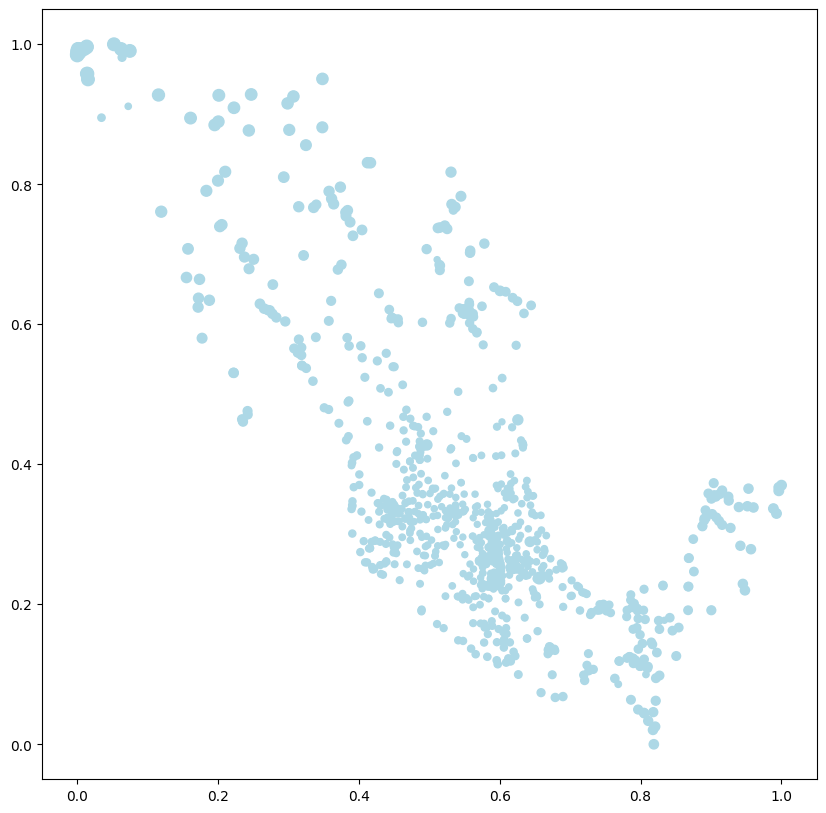

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(x, y, s=df['Distancia Esperada']*100, c='lightblue')

plt.show()

### Distancia minima

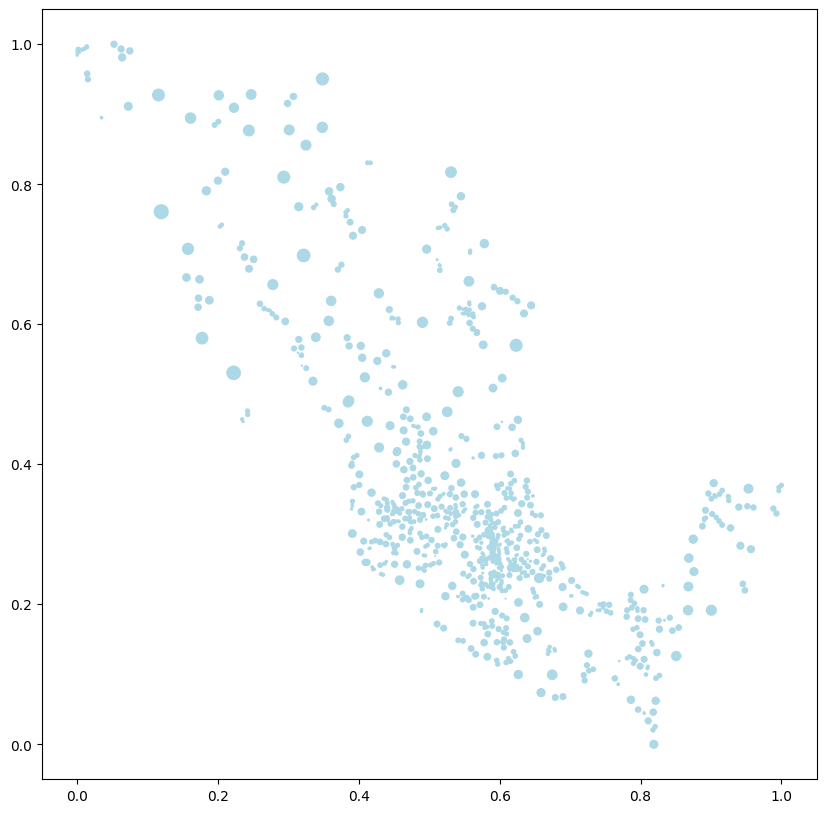

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(x, y, s=df['Distancia Minima']*1500, c='lightblue')

plt.show()

### Distancia maxima

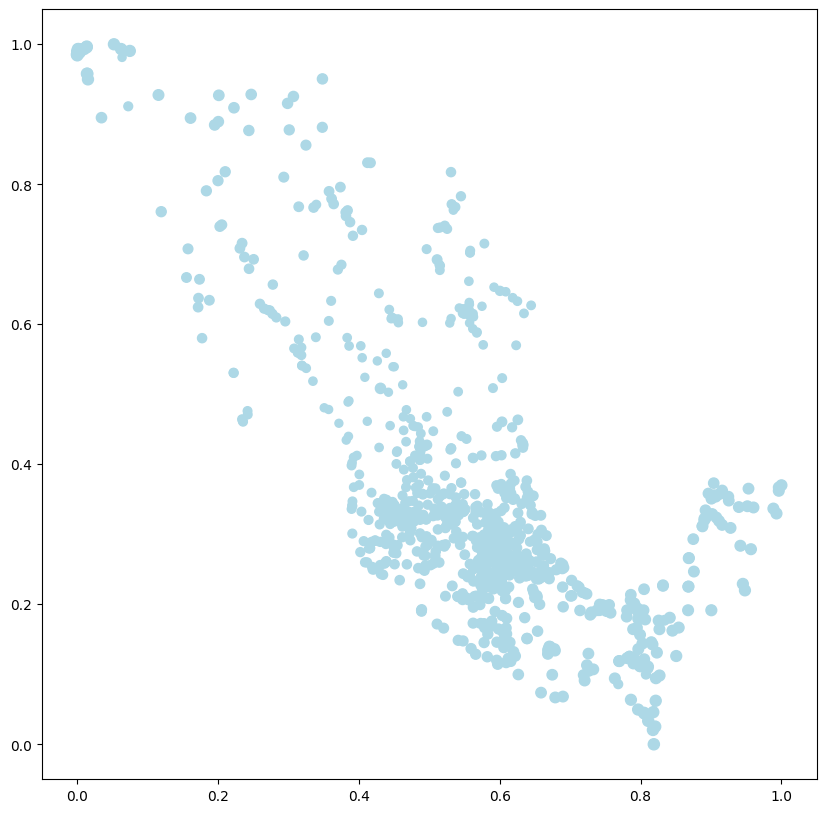

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(x, y, s=df['Distancia Maxima']*50, c='lightblue')

plt.show()